# Which is the Best Plan?

You work as an analyst for the telecommunications operator **Megaline**. The company offers two prepaid plans to its customers: **Surf** and **Ultimate**. The commercial department wants to know which of the plans generates more revenue in order to adjust their advertising budget.

You are going to perform a preliminary analysis of the two plans based on a relatively small selection of customers. You will have the data of 500 Megaline customers: who the customers are, where they are from, which plan they use, as well as the number of calls they made and the text messages they sent in **2018**. Your task is to analyze customer behavior and determine which prepaid plan generates more revenue.

## Initialization

In [85]:
# Load All Libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from math import factorial
from scipy import stats as st
import math as mt
from datetime import datetime
import math
import pandas

## Cargar datos

In [86]:
# Load Data Files into Different DataFrames
df_users = pd.read_csv('megaline_users.csv', sep=',')
df_calls = pd.read_csv('megaline_calls.csv', sep=',')
df_messages = pd.read_csv('megaline_messages.csv', sep=',')
df_internet = pd.read_csv('megaline_internet.csv', sep=',')
df_plans = pd.read_csv('megaline_plans.csv', sep=',')

## Prepare the data. Preparar los datos

In [87]:
#Visualizing Datasets for Preliminary Inspection
display(df_users.head(10))
print()
display(df_calls.head(10))
print()
display(df_messages.head(10))
print()
display(df_internet.head(10))
print()
display(df_plans)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Tariffs

In [88]:
# Print the general/summary information about the tariffs DataFrame
df_plans.info()
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes



In [89]:
# Print a sample of the data for the tariffs.
display(df_plans)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


General data and specifications of the plans are established, including their cost standards. The type of variables in the tariffs DataFrame is aligned, as it will feed into the other DataFrames to determine if consumption is within the set range. These ranges are defined by a previously agreed-upon price. If consumption exceeds the agreed range, additional calculations will need to be made.

The variable `mb_per_month_included`, which is expressed in megabytes (MB), needs to be converted to gigabytes (GB). Additionally, the plan data in GB should be rounded to a whole number.

The variable `plan_name` should also be adjusted and standardized so it can be properly related to the users DataFrame.

### Correct data.

In [90]:
#At the moment, no adjustments are made to the presented data.
df_plans['mb_per_month_included'] = (df_plans['mb_per_month_included']//1000)#Conversion of MB to GB and rounding to the minimum usage with "//"
df_plans['mb_per_month_included'] = df_plans['mb_per_month_included'].astype('int')#Convert the variable to integer.
df_plans = df_plans.rename(columns = {"plan_name": "plan"})

display(df_plans)
print()
df_plans.info()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan
0,50,15,500,20,10,0.03,0.03,surf
1,1000,30,3000,70,7,0.01,0.01,ultimate



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int32  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan                   2 non-null      object 
dtypes: float64(2), int32(1), int64(4), object(1)
memory usage: 252.0+ bytes


### Enrich the data

In [91]:
#Rename the column to the established unit of GB.
df_plans = df_plans.rename(columns={'mb_per_month_included': 'gb_per_month_included'})#Rename the header after the measurement adjustment.
display(df_plans)

,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan
0,50,15,500,20,10,0.03,0.03,surf
1,1000,30,3000,70,7,0.01,0.01,ultimate


## Users

In [92]:
# Print the general/summary information about the Users DataFrame
df_users.info()
df_users['state']=df_users['city'].str[-6:-4]
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB



In [93]:
# Print a sample of the data for users.
display(df_users.sample(10))

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,state
315,1315,Mora,Schroeder,45,"Raleigh-Cary, NC MSA",2018-04-26,surf,2018-10-03,NC
428,1428,Asuncion,Conrad,66,"Phoenix-Mesa-Chandler, AZ MSA",2018-10-23,surf,NaN,AZ
10,1010,Wilber,Blair,52,"Dallas-Fort Worth-Arlington, TX MSA",2018-03-09,surf,NaN,TX
312,1312,Kory,Emerson,42,"Fresno, CA MSA",2018-01-26,surf,NaN,CA
159,1159,Dierdre,Baker,58,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-07-21,ultimate,NaN,FL
54,1054,Denis,Frost,50,"Phoenix-Mesa-Chandler, AZ MSA",2018-04-21,surf,2018-12-31,AZ
121,1121,Kathaleen,Albert,34,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-03-13,surf,NaN,FL
381,1381,German,Burris,44,"Austin-Round Rock-Georgetown, TX MSA",2018-08-30,surf,NaN,TX
336,1336,Vance,Bradshaw,34,"Portland-Vancouver-Hillsboro, OR-WA MSA",2018-04-04,surf,NaN,WA
213,1213,Carl,Newman,47,"San Diego-Chula Vista-Carlsbad, CA MSA",2018-11-25,ultimate,NaN,CA


- The general information of the users is established in the DataFrame.
- Upon reviewing the information in each variable of the DataFrame, some improvements are proposed:
    - **user_id**: Currently identified as an integer.
    - **reg_date**: Initially stored as a string or object, which is a date and needs to be converted to the `date` type for proper data analysis. Additionally, the registration dates span different months of the year 2018, so it’s necessary to separate the date into year, month, and day for better filtering. The `.to_datetime` method will be used for this transformation.
    - **churn_date**: This is the only variable with missing data. Missing values indicate that the tariff is still in use at the time of data collection. These missing values can be left as-is for better data control. Moreover, we can extract the number of users who abandoned the tariff, which amounts to 466 active users and 34 users who have a recorded churn date.

### Correcting Data

In [94]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], errors="coerce")#Adjustments are made to the **date** data type to allow proper manipulation and analysis.
display(df_users.head(10))
print()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,state
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,GA
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,WA
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN,NV
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN,OK
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN,WA
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN,TX
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,CA
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN,MI
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN,FL
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN,CA


### Enrich the data

In [95]:
#Create Row for Dates
df_users['year'] = df_users['reg_date'].dt.strftime('%Y')
df_users['month'] = df_users['reg_date'].dt.strftime('%m')
df_users['day'] = df_users['reg_date'].dt.strftime('%d')
display(df_users.head(10))
print()
df_users.info()
print()
print("The number of **duplicated data** ",df_users['user_id'].duplicated().sum(),"entries in this information is presented")#A validation check is performed to identify any **duplicate user information**
print("The total number of **active clients** ", df_users['churn_date'].isnull().sum(), "is counted.")#The number of clients with an active plan is established, and the number of clients whose plans have ended is also calculated.
print("A total of",  500-(df_users['churn_date'].isnull().sum()), "clients no longer have service.")
df_users['state']=df_users['city'].str[-6:-4]
df_users.describe()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,state,year,month,day
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,GA,2018,12,24
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,WA,2018,08,13
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN,NV,2018,10,21
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN,OK,2018,01,28
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN,WA,2018,05,23
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN,TX,2018,11,29
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,CA,2018,11,27
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN,MI,2018,07,11
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN,FL,2018,08,03
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN,CA,2018,04,22



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     object        
 8   state       500 non-null    object        
 9   year        500 non-null    object        
 10  month       500 non-null    object        
 11  day         500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 47.0+ KB

The number of **duplicated data**  0 entries in this information is presented
The total number of **active clients**  466 is counted.
A total of 34 cli

,user_id,age,reg_date
count,500.000000,500.000000,500
mean,1249.500000,45.486000,2018-06-24 16:30:43.200000
min,1000.000000,18.000000,2018-01-01 00:00:00
25%,1124.750000,30.000000,2018-03-25 18:00:00
50%,1249.500000,46.000000,2018-06-20 00:00:00
75%,1374.250000,61.000000,2018-09-20 06:00:00
max,1499.000000,75.000000,2018-12-31 00:00:00
std,144.481833,16.972269,NaN


Validating this dataset allows us to display statistical information from the table for decision-making purposes. It helps to establish key metrics such as the **minimum**, **mean**, and **maximum**, among other data points.

## Calls

In [96]:
# Print general/summary information about the Calls DataFrame.  
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [97]:
# Print a sample of data for the calls.
display(df_calls.head(10))

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


The DataFrame presents the following:

- `call_date` is of object type, which would prevent analysis and manipulation. It should be adjusted to the date type for proper handling. This can be done using the `.to_datetime` command to convert the column.
- The `id` variable could cause confusion with the other DataFrames, so it should be adjusted to differentiate it from the others. The `.rename` command is used to change the name of the variable.
- The `duration` column should be rounded and handled in minutes. The `.apply(np.ceil)` command is used to round the numbers to the next integer.
- For better data manipulation, the date should be separated into different components (year, month, day) for more detailed analysis.

### Correct the Data

In [98]:
#**Adjust the DataFrame**: Apply rounding to the nearest integer and change the data type of the variables where necessary.
df_calls['duration'] = df_calls['duration'].apply(np.ceil) #Apply `np.ceil` to round the `duration` column
df_calls['duration'] = df_calls['duration'].astype('int') #Convert to integers
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], errors="coerce")#Convert data to date type


### Enrich the Data

In [99]:
df_calls['year'] = df_calls['call_date'].dt.strftime('%Y')
df_calls['month'] = df_calls['call_date'].dt.strftime('%m')
df_calls['day'] = df_calls['call_date'].dt.strftime('%d')
df_calls = df_calls.rename(columns={'id': 'id_calls'})
display(df_calls)

print()
print("The quantity of: ",df_calls['id_calls'].duplicated().sum(),"Duplicate call records in this information is presented.")#Validation to check if duplicated user information exists.
df_calls.describe()

,id_calls,user_id,call_date,duration,year,month,day
0,1000_93,1000,2018-12-27,9,2018,12,27
1,1000_145,1000,2018-12-27,14,2018,12,27
2,1000_247,1000,2018-12-27,15,2018,12,27
3,1000_309,1000,2018-12-28,6,2018,12,28
4,1000_380,1000,2018-12-30,5,2018,12,30
...,...,...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,9,2018,11,21
137731,1499_200,1499,2018-10-20,11,2018,10,20
137732,1499_201,1499,2018-09-21,9,2018,09,21
137733,1499_202,1499,2018-10-10,1,2018,10,10



The quantity of:  0 Duplicate call records in this information is presented.


,user_id,call_date,duration
count,137735.000000,137735,137735.000000
mean,1247.658046,2018-09-25 19:57:56.319018496,7.146673
min,1000.000000,2018-01-15 00:00:00,0.000000
25%,1128.000000,2018-08-08 00:00:00,2.000000
50%,1247.000000,2018-10-12 00:00:00,6.000000
75%,1365.000000,2018-11-26 00:00:00,11.000000
max,1499.000000,2018-12-31 00:00:00,38.000000
std,139.416268,NaN,5.953919


Validating the call database allows us to present general statistical information of the data for decision-making, enabling us to establish the minimum, average, and maximum number of minutes, among other data points.

## Messages

In [100]:
# Print the general/summary information about the messages DataFrame.
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [101]:
# Print a sample of data for the messages.
display(df_messages.head(10))

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


The DataFrame presents the following:

- **message_date**: It currently has a data type of `object`, which would not allow for proper analysis. This variable should be converted to `date` type for easier manipulation. The change is made using the `.to_datetime()` command on the column.

- **id**: The `id` variable could cause confusion with other variables in the other DataFrames. To avoid this, the column name should be adjusted to differentiate it. The `.rename()` command will be used to change the column name.

- **Date**: For better data manipulation, it's necessary to separate the date into its components (day, month, year) to perform a more detailed analysis. This will allow for segmenting the data by date and facilitate interpretation.

### Data Correction

In [102]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], errors="coerce")

### Data Enrichment

In [103]:
df_messages['year'] = df_messages['message_date'].dt.strftime('%Y')
df_messages['month'] = df_messages['message_date'].dt.strftime('%m')
df_messages['day'] = df_messages['message_date'].dt.strftime('%d')
df_messages = df_messages.rename(columns={'id': 'id_messages'})
display(df_messages)
print()
df_messages.info()
print()
print("A total of ",df_messages['id_messages'].duplicated().sum(),"Duplicate Message Records")#Validation of Duplicate User Information
df_messages.describe()

,id_messages,user_id,message_date,year,month,day
0,1000_125,1000,2018-12-27,2018,12,27
1,1000_160,1000,2018-12-31,2018,12,31
2,1000_223,1000,2018-12-31,2018,12,31
3,1000_251,1000,2018-12-27,2018,12,27
4,1000_255,1000,2018-12-26,2018,12,26
...,...,...,...,...,...,...
76046,1497_526,1497,2018-12-24,2018,12,24
76047,1497_536,1497,2018-12-24,2018,12,24
76048,1497_547,1497,2018-12-31,2018,12,31
76049,1497_558,1497,2018-12-24,2018,12,24



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id_messages   76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   year          76051 non-null  object        
 4   month         76051 non-null  object        
 5   day           76051 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 3.5+ MB

A total of  0 Duplicate Message Records


,user_id,message_date
count,76051.000000,76051
mean,1245.972768,2018-10-03 23:51:32.172358144
min,1000.000000,2018-01-15 00:00:00
25%,1123.000000,2018-08-22 00:00:00
50%,1251.000000,2018-10-20 00:00:00
75%,1362.000000,2018-12-01 00:00:00
max,1497.000000,2018-12-31 00:00:00
std,139.843635,NaN


Validating in the message database allows us to display general statistical information about the data for decision-making, enabling the establishment of the minimum number of messages the client had, the average number of messages, and the maximum number of messages, among other data.

## Internet

In [104]:
# Prints the general/summary information about the internet DataFrame.
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [105]:
# Prints a data sample for internet traffic.
display(df_internet.head(10))

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


The DataFrame presents the following:  
- The `session_date` column has an object data type, which would not allow for analysis manipulation. It should be adjusted to have this variable in a date format. The change can be made using the `.to_datetime` command on the column.  
- The `id` variable might cause confusion with the other variables from the other DataFrames. In this case, it should be adjusted to differentiate it from the others. Use `.rename` to change the name of the variable.  
- For better data manipulation, the date should be split for more detailed analysis.  
- For adjusting the consumption, note that rounding will not be done individually for each session. The adjustment will be made on a monthly basis, rounding to the next digit.

### Correct the data.

In [106]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], errors="coerce")

### Enrich the data. 

In [107]:
df_internet['year'] = df_internet['session_date'].dt.strftime('%Y')
df_internet['month'] = df_internet['session_date'].dt.strftime('%m')
df_internet['day'] = df_internet['session_date'].dt.strftime('%d')
df_internet = df_internet.rename(columns={'id': 'id_internet'})
df_internet['mb_used'] = df_internet['mb_used']/1000
df_internet = df_internet.rename(columns={'mb_used': 'gb_used'})
display(df_internet)
df_internet.info()
print()
print("The quantity of is presented.",df_internet['id_internet'].duplicated().sum(),"duplicated session records in this information") #Validation to check if duplicate user information exists.
print()
df_internet.describe()

,id_internet,user_id,session_date,gb_used,year,month,day
0,1000_13,1000,2018-12-29,0.08986,2018,12,29
1,1000_204,1000,2018-12-31,0.00000,2018,12,31
2,1000_379,1000,2018-12-28,0.66040,2018,12,28
3,1000_413,1000,2018-12-26,0.27099,2018,12,26
4,1000_442,1000,2018-12-27,0.88022,2018,12,27
...,...,...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,0.21806,2018,10,20
104821,1499_216,1499,2018-12-30,0.30472,2018,12,30
104822,1499_217,1499,2018-09-22,0.29275,2018,09,22
104823,1499_218,1499,2018-12-07,0.00000,2018,12,07


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id_internet   104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   gb_used       104825 non-null  float64       
 4   year          104825 non-null  object        
 5   month         104825 non-null  object        
 6   day           104825 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 5.6+ MB

The quantity of is presented. 0 duplicated session records in this information



,user_id,session_date,gb_used
count,104825.000000,104825,104825.000000
mean,1242.496361,2018-09-26 11:37:55.048890880,0.366714
min,1000.000000,2018-01-15 00:00:00,0.000000
25%,1122.000000,2018-08-11 00:00:00,0.136080
50%,1236.000000,2018-10-13 00:00:00,0.343980
75%,1367.000000,2018-11-27 00:00:00,0.554610
max,1499.000000,2018-12-31 00:00:00,1.693470
std,142.053913,NaN,0.277171


Validating in the data consumption database allows us to display general statistical information about the data for decision-making, enabling the establishment of the minimum data consumption the client had, the average data consumption, and the maximum data consumption, among other data.

## Study the tariff conditions.

In [108]:
#Print the tariff conditions and make sure they are clear to you.
display(df_plans)


,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan
0,50,15,500,20,10,0.03,0.03,surf
1,1000,30,3000,70,7,0.01,0.01,ultimate


From general to specific, the basic parameters of the two plans are established.
It determines the normal payment and the services each client has, and additionally, it shows in case of exceeding the assigned consumption, what the additional charges are and the criteria they are based on.
Based on the data established in each of the tables above, the information can be cross-referenced to determine what additional payments clients must make.

## Add data by user.

In [109]:
# Calculate the number of calls made by each user per month. Save the result.
qqcallxuser = df_calls.pivot_table(index='user_id', #The column whose values are converted into indexes in the pivot table;
                            columns='month', #The column whose values we want to aggregate in the pivot table;
                            values='duration', #The aggregation function we want to apply to the values in each group of rows and columns.
                            aggfunc='count', 
                           fill_value = 0, #Fill missing values with 0.
                                     margins=True #Perform a compiled sum.
                                 )
print("Table of the number of calls by user in each month.")
print()
display(qqcallxuser)#Display the pivot table.
print()
print("Table with a specific sample.")
print()
display(qqcallxuser[(qqcallxuser.index==1104)])
print()
print("Table from the original DataFrame of a specific sample.")
display(df_calls[df_calls['user_id']==1104])#A sample value is selected for verification.

Table of the number of calls by user in each month.



month,01,02,03,04,05,06,07,08,09,10,11,12,All
user_id,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,0,16,16
1001,0,0,0,0,0,0,0,27,49,65,64,56,261
1002,0,0,0,0,0,0,0,0,0,11,55,47,113
1003,0,0,0,0,0,0,0,0,0,0,0,149,149
1004,0,0,0,0,21,44,49,49,42,61,54,50,370
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,0,0,0,0,0,0,0,18,52,46,39,40,195
1497,0,0,0,0,0,0,0,0,0,0,0,54,54
1498,0,37,37,47,35,37,43,44,45,46,41,39,451



Table with a specific sample.



month,01,02,03,04,05,06,07,08,09,10,11,12,All
user_id,,,,,,,,,,,,,
1104,0,0,0,0,0,0,0,0,0,0,0,4,4



Table from the original DataFrame of a specific sample.


,id_calls,user_id,call_date,duration,year,month,day
27445,1104_2,1104,2018-12-28,1,2018,12,28
27446,1104_3,1104,2018-12-30,7,2018,12,30
27447,1104_8,1104,2018-12-29,3,2018,12,29
27448,1104_11,1104,2018-12-31,0,2018,12,31


In [110]:
# Calculate the number of minutes made by each user per month. Save the result.
qmincallxuser = df_calls.pivot_table(index='user_id', #The column whose values are converted into indexes in the pivot table;
                            columns='month', #The column whose values are converted into columns in the pivot table
                            values='duration', #The column whose values we want to aggregate in the pivot table;
                            aggfunc='sum', #The aggregation function we want to apply to the values in each group of rows and columns.
                           fill_value = 0, #Fill missing values with 0.
                                     margins=True #Perform a compiled sum.
                                 )
print("Table of the number of minutes by user in each month.")
print()
display(qmincallxuser)#Display the pivot table.
print()
print("Table with a specific sample.")
print()
display(qmincallxuser[(qmincallxuser.index==1104)]) 
print()
print("Table from the original DataFrame of a specific sample.")
print()
display(df_calls[df_calls['user_id']==1104])

Table of the number of minutes by user in each month.



month,01,02,03,04,05,06,07,08,09,10,11,12,All
user_id,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,0,124,124
1001,0,0,0,0,0,0,0,182,315,393,426,412,1728
1002,0,0,0,0,0,0,0,0,0,59,386,384,829
1003,0,0,0,0,0,0,0,0,0,0,0,1104,1104
1004,0,0,0,0,193,275,381,354,301,365,476,427,2772
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,0,0,0,0,0,0,0,122,414,317,308,294,1455
1497,0,0,0,0,0,0,0,0,0,0,0,300,300
1498,0,244,266,365,288,238,321,266,363,298,223,339,3211



Table with a specific sample.



month,01,02,03,04,05,06,07,08,09,10,11,12,All
user_id,,,,,,,,,,,,,
1104,0,0,0,0,0,0,0,0,0,0,0,11,11



Table from the original DataFrame of a specific sample.



,id_calls,user_id,call_date,duration,year,month,day
27445,1104_2,1104,2018-12-28,1,2018,12,28
27446,1104_3,1104,2018-12-30,7,2018,12,30
27447,1104_8,1104,2018-12-29,3,2018,12,29
27448,1104_11,1104,2018-12-31,0,2018,12,31


In [111]:
# Calculate the number of mesagges made by each user per month. Save the result.
qmessxuser = df_messages.pivot_table(index='user_id', 
                            columns='month', 
                            values='year', 
                            aggfunc='count', 
                           fill_value = 0, 
                                     margins=True 
                                 )
print("Table of the number of mesagges by user in each month.")
print()
display(qmessxuser)
print()
print("Table with a specific sample.")
print()
display(qmessxuser[(qmessxuser.index==1481)])
print()
print("Table from the original DataFrame of a specific sample.")
print()
display(df_messages[df_messages['user_id']==1481])#A sample value is selected for verification.


Table of the number of mesagges by user in each month.



month,01,02,03,04,05,06,07,08,09,10,11,12,All
user_id,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,0,11,11
1001,0,0,0,0,0,0,0,30,44,53,36,44,207
1002,0,0,0,0,0,0,0,0,0,15,32,41,88
1003,0,0,0,0,0,0,0,0,0,0,0,50,50
1004,0,0,0,0,7,18,26,25,21,24,25,31,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1492,0,0,0,0,0,0,0,0,11,29,31,37,108
1494,0,0,0,0,0,0,20,27,21,38,35,33,174
1496,0,0,0,0,0,0,0,2,21,18,13,11,65



Table with a specific sample.



month,01,02,03,04,05,06,07,08,09,10,11,12,All
user_id,,,,,,,,,,,,,
1481,0,0,0,0,0,0,0,0,0,0,0,3,3



Table from the original DataFrame of a specific sample.



,id_messages,user_id,message_date,year,month,day
74584,1481_9,1481,2018-12-28,2018,12,28
74585,1481_38,1481,2018-12-28,2018,12,28
74586,1481_50,1481,2018-12-29,2018,12,29


In [112]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
qinterxuser = df_internet.pivot_table(index='user_id', 
                            columns='month',
                            values='gb_used', 
                            aggfunc='sum', 
                           fill_value = 0, 
                                     margins=True
                                 )
qinterxuser=qinterxuser.apply(np.ceil)
print("Table of internet consumption by user each month")
print()
display(qinterxuser)
print()
print("Table with a specific sample.")
print()
display(qinterxuser[(qinterxuser.index==1323)])
print()
print("Table from the original DataFrame of a specific sample.")
display(df_internet[df_internet['user_id']==1323])

Table of internet consumption by user each month



month,01,02,03,04,05,06,07,08,09,10,11,12,All
user_id,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,14.0,23.0,19.0,20.0,81.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,20.0,15.0,41.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,28.0
1004,0.0,0.0,0.0,0.0,7.0,21.0,25.0,28.0,19.0,15.0,22.0,22.0,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,17.0,15.0,9.0,17.0,65.0
1497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0
1498,0.0,20.0,20.0,20.0,23.0,15.0,25.0,21.0,23.0,21.0,20.0,24.0,228.0



Table with a specific sample.



month,01,02,03,04,05,06,07,08,09,10,11,12,All
user_id,,,,,,,,,,,,,
1323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0



Table from the original DataFrame of a specific sample.


,id_internet,user_id,session_date,gb_used,year,month,day
69286,1323_10,1323,2018-12-31,0.04427,2018,12,31
69287,1323_251,1323,2018-12-31,0.46773,2018,12,31
69288,1323_349,1323,2018-12-31,0.51285,2018,12,31


In [113]:
# Merge the data of calls, minutes, messages, and internet based on user_id and month.
df_calls.insert(1, "service", "qcall")
df_calls.insert(2, "qcallsed", 1)
cll1=df_calls
calls1=cll1.groupby(by=["user_id","month", "service"])['duration'].sum()
display(calls1.head(10))

print()
cll2 = cll1.replace('qcall', 'qmin') 
calls2=cll2.groupby(by=["user_id","month", "service"])['duration'].count()
display(calls2.head(10))

print()
df_messages.insert(1, "service", "qmss")
df_messages.insert(2, "qmessage", 1)
mess=df_messages.groupby(by=["user_id","month", "service"])['message_date'].count()
display(mess)

print()
df_internet.insert(1, "service", "qint")
inte=df_internet.groupby(by=["user_id","month", "service"])['gb_used'].sum().apply(np.ceil)
display(inte.head(10))

print()
df_m = pd.merge(calls2, calls1, on=["user_id", "month"], how="left").merge(mess, on=["user_id", "month"], how="left").merge(inte, on=["user_id", "month"], how="left")
df_m = df_m.rename(columns = {"duration_y": "Minutesxmonth", "duration_x": "Qcallxmonth", "message_date": "messagexmonth", "gb_used": "gbxmonth"})

display(df_m.head(15))
#display(df_m2.head(15))


user_id  month  service
1000     12     qcall       124
1001     08     qcall       182
         09     qcall       315
         10     qcall       393
         11     qcall       426
         12     qcall       412
1002     10     qcall        59
         11     qcall       386
         12     qcall       384
1003     12     qcall      1104
Name: duration, dtype: int32

user_id  month  service
1000     12     qmin        16
1001     08     qmin        27
         09     qmin        49
         10     qmin        65
         11     qmin        64
         12     qmin        56
1002     10     qmin        11
         11     qmin        55
         12     qmin        47
1003     12     qmin       149
Name: duration, dtype: int64

user_id  month  service
1000     12     qmss       11
1001     08     qmss       30
         09     qmss       44
         10     qmss       53
         11     qmss       36
                           ..
1496     09     qmss       21
         10     qmss       18
         11     qmss       13
         12     qmss       11
1497     12     qmss       50
Name: message_date, Length: 1806, dtype: int64

user_id  month  service
1000     12     qint        2.0
1001     08     qint        7.0
         09     qint       14.0
         10     qint       23.0
         11     qint       19.0
         12     qint       20.0
1002     10     qint        7.0
         11     qint       20.0
         12     qint       15.0
1003     12     qint       28.0
Name: gb_used, dtype: float64

Qcallxmonth  Minutesxmonth  messagexmonth  gbxmonth
user_id month                                                     
1000    12              16            124           11.0       2.0
1001    08              27            182           30.0       7.0
        09              49            315           44.0      14.0
        10              65            393           53.0      23.0
        11              64            426           36.0      19.0
        12              56            412           44.0      20.0
1002    10              11             59           15.0       7.0
        11              55            386           32.0      20.0
        12              47            384           41.0      15.0
1003    12             149           1104           50.0      28.0
1004    05              21            193            7.0       7.0
        06              44            275           18.0      21.0
        07              49            381           26.0      25.0
        08              49            354           25.0      28.0
        09              42            301           21.0      19.0

In [114]:
# Add the tariff information.

#Unification of user and plan tariff data.
df_plxus=pd.merge(df_users, df_plans, on="plan")


#_______________________________________________________________________________________________cant llamadas

#Unification of call data and (users and tariffs).
ll1=pd.merge(df_calls, df_plxus, on="user_id", how="left")
ll2=ll1.groupby(by=["user_id","month_x", "service", "plan"]).agg(usd_monthly_pay=('usd_monthly_pay', max), Qcallsxmonth=('qcallsed', sum))

#_______________________________________________________________________________________________llamadas

#Unification of call data and (users and tariffs).
l1=pd.merge(df_calls, df_plxus, on="user_id", how="left")
l2=l1.groupby(by=["user_id","month_x", "service", "plan"]).agg(Minutesxmonth=('duration', sum), minutes_included=('minutes_included', max), usd_per_minute=("usd_per_minute", max))

#Definition of a function to evaluate if the minutes are within the range of the established plan; if not, an additional value is set.
def adcostmin(row):
    result= 0
    if row["Minutesxmonth"] > row["minutes_included"]:
        result = ((row['Minutesxmonth']-row['minutes_included'])*row['usd_per_minute'])
    else:
        0
    return result

#Application of the function.
l2['ad_minut'] = l2.apply(adcostmin, axis=1)

#_______________________________________________________________________________________________mensajes

#Unification of message data and (users and tariffs).
m1=pd.merge(df_messages, df_plxus, on="user_id", how="left")
m2=m1.groupby(by=["user_id","month_x", "service", "plan"]).agg(messagexmonth=('qmessage', sum), messages_included=('messages_included', max), usd_per_message=("usd_per_message", max)).fillna(0)

#Definition of a function to evaluate if the minutes are within the range of the established plan; if not, an additional value is set.
def adcostmess(row):
    result= 0
    if row["messagexmonth"] > row["messages_included"]:
        result = ((row['messagexmonth']-row['messages_included'])*row['usd_per_message'])
    else:
        0
    return result

#Application of the function.
m2['ad_message'] = m2.apply(adcostmess, axis=1)

#_______________________________________________________________________________________________internet

#Unification of internet data and (users and tariffs).
i1=pd.merge(df_internet, df_plxus, on="user_id", how="left")
i2=i1.groupby(by=["user_id","month_x", "service", "plan"]).agg(gbxmonth=('gb_used', sum), gb_per_month_included=('gb_per_month_included', max), usd_per_gb=("usd_per_gb", max)).apply(np.ceil)

#Definition of a function to evaluate if the minutes are within the range of the established plan; if not, an additional value is set.
def adcostint(row):
    result= 0
    if row["gbxmonth"] > row["gb_per_month_included"]:
        result = ((row['gbxmonth']-row['gb_per_month_included'])*row['usd_per_gb'])
    else:
        0
    return result

#Application of the function.
i2['ad_internet'] = i2.apply(adcostint, axis=1)

#_______________________________________________________________________________________________unificacion tarifas

df_ttinf = pd.merge(ll2, l2, on=["user_id", "month_x", "plan"], how="left").merge(m2, on=["user_id", "month_x", "plan"], how="left").merge(i2, on=["user_id", "month_x", "plan"], how="left").fillna(0)

display(df_ttinf)


C:\Users\Tuberquia\AppData\Local\Temp\ipykernel_11300\212634930.py:11: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  ll2=ll1.groupby(by=["user_id","month_x", "service", "plan"]).agg(usd_monthly_pay=('usd_monthly_pay', max), Qcallsxmonth=('qcallsed', sum))
C:\Users\Tuberquia\AppData\Local\Temp\ipykernel_11300\212634930.py:11: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  ll2=ll1.groupby(by=["user_id","month_x", "service", "plan"]).agg(usd_monthly_pay=('usd_monthly_pay', max), Qcallsxmonth=('qcallsed', sum))
C:\Users\Tuberquia\AppData\Local\Temp\ipykernel_11300\212634930.py:17: FutureWarning: The provided callable <built

usd_monthly_pay  Qcallsxmonth  Minutesxmonth  \
user_id month_x plan                                                     
1000    12      ultimate               70            16            124   
1001    08      surf                   20            27            182   
        09      surf                   20            49            315   
        10      surf                   20            65            393   
        11      surf                   20            64            426   
...                                   ...           ...            ...   
1498    12      surf                   20            39            339   
1499    09      surf                   20            41            346   
        10      surf                   20            53            385   
        11      surf                   20            45            308   
        12      surf                   20            65            496   

                          minutes_included  usd_per_minute  ad_minut  \
user_id month_x plan                                                   
1000    12      ultimate              3000            0.01       0.0   
1001    08      surf                   500            0.03       0.0   
        09      surf                   500            0.03       0.0   
        10      surf                   500            0.03       0.0   
        11      surf                   500            0.03       0.0   
...                                    ...             ...       ...   
1498    12      surf                   500            0.03       0.0   
1499    09      surf                   500            0.03       0.0   
        10      surf                   500            0.03       0.0   
        11      surf                   500            0.03       0.0   
        12      surf                   500            0.03       0.0   

                          messagexmonth  messages_included  usd_per_message  \
user_id month_x plan                                                          
1000    12      ultimate           11.0             1000.0             0.01   
1001    08      surf               30.0               50.0             0.03   
        09      surf               44.0               50.0             0.03   
        10      surf               53.0               50.0             0.03   
        11      surf               36.0               50.0             0.03   
...                                 ...                ...              ...   
1498    12      surf                0.0                0.0             0.00   
1499    09      surf                0.0                0.0             0.00   
        10      surf                0.0                0.0             0.00   
        11      surf                0.0                0.0             0.00   
        12      surf                0.0                0.0             0.00   

                          ad_message  gbxmonth  gb_per_month_included  \
user_id month_x plan                                                    
1000    12      ultimate        0.00       2.0                   30.0   
1001    08      surf            0.00       7.0                   15.0   
        09      surf            0.00      14.0                   15.0   
        10      surf            0.09      23.0                   15.0   
        11      surf            0.00      19.0                   15.0   
...                              ...       ...                    ...   
1498    12      surf            0.00      24.0                   15.0   
1499    09      surf            0.00      13.0                   15.0   
        10      surf            0.00      20.0                   15.0   
        11      surf            0.00      17.0                   15.0   
        12      surf            0.00      23.0                   15.0   

                          usd_per_gb  ad_internet  
user_id month_x plan                               
1000    12      ultimate         7.0        

In [115]:
# Calculate the monthly income for each user.
print("""General information data where the consumption of each user is presented across different months, and the consumption in each service depending on each plan.""")
print()
df_ttinf['costtoxmonth'] = df_ttinf['usd_monthly_pay']+df_ttinf['ad_minut']+df_ttinf['ad_message']+df_ttinf['ad_internet']
display(df_ttinf)
print()
df_ttinfadj = df_ttinf.reindex(['costtoxmonth', 'usd_monthly_pay', 'ad_minut', 'ad_message', 'ad_internet'], axis=1)
print("""Summary table showing only the income per user, including additional consumption in the plans.""")
print()
display(df_ttinfadj.head(15))
print()
costxuser=df_ttinfadj.groupby(by=["user_id"]).agg(costtoxmonth=('costtoxmonth', sum))
print("""Table of income for each user on an annualized basis.""")
print()
display(costxuser)

General information data where the consumption of each user is presented across different months, and the consumption in each service depending on each plan.



usd_monthly_pay  Qcallsxmonth  Minutesxmonth  \
user_id month_x plan                                                     
1000    12      ultimate               70            16            124   
1001    08      surf                   20            27            182   
        09      surf                   20            49            315   
        10      surf                   20            65            393   
        11      surf                   20            64            426   
...                                   ...           ...            ...   
1498    12      surf                   20            39            339   
1499    09      surf                   20            41            346   
        10      surf                   20            53            385   
        11      surf                   20            45            308   
        12      surf                   20            65            496   

                          minutes_included  usd_per_minute  ad_minut  \
user_id month_x plan                                                   
1000    12      ultimate              3000            0.01       0.0   
1001    08      surf                   500            0.03       0.0   
        09      surf                   500            0.03       0.0   
        10      surf                   500            0.03       0.0   
        11      surf                   500            0.03       0.0   
...                                    ...             ...       ...   
1498    12      surf                   500            0.03       0.0   
1499    09      surf                   500            0.03       0.0   
        10      surf                   500            0.03       0.0   
        11      surf                   500            0.03       0.0   
        12      surf                   500            0.03       0.0   

                          messagexmonth  messages_included  usd_per_message  \
user_id month_x plan                                                          
1000    12      ultimate           11.0             1000.0             0.01   
1001    08      surf               30.0               50.0             0.03   
        09      surf               44.0               50.0             0.03   
        10      surf               53.0               50.0             0.03   
        11      surf               36.0               50.0             0.03   
...                                 ...                ...              ...   
1498    12      surf                0.0                0.0             0.00   
1499    09      surf                0.0                0.0             0.00   
        10      surf                0.0                0.0             0.00   
        11      surf                0.0                0.0             0.00   
        12      surf                0.0                0.0             0.00   

                          ad_message  gbxmonth  gb_per_month_included  \
user_id month_x plan                                                    
1000    12      ultimate        0.00       2.0                   30.0   
1001    08      surf            0.00       7.0                   15.0   
        09      surf            0.00      14.0                   15.0   
        10      surf            0.09      23.0                   15.0   
        11      surf            0.00      19.0                   15.0   
...                              ...       ...                    ...   
1498    12      surf            0.00      24.0                   15.0   
1499    09      surf            0.00      13.0                   15.0   
        10      surf            0.00      20.0                   15.0   
        11      surf            0.00      17.0                   15.0   
        12      surf            0.00      23.0                   15.0   

                          usd_per_gb  ad_internet  costtoxmonth  
user_id month_x plan                                             
1000    12      


Summary table showing only the income per user, including additional consumption in the plans.



costtoxmonth  usd_monthly_pay  ad_minut  ad_message  \
user_id month_x plan                                                            
1000    12      ultimate         70.00               70      0.00        0.00   
1001    08      surf             20.00               20      0.00        0.00   
        09      surf             20.00               20      0.00        0.00   
        10      surf            100.09               20      0.00        0.09   
        11      surf             60.00               20      0.00        0.00   
        12      surf             70.00               20      0.00        0.00   
1002    10      surf             20.00               20      0.00        0.00   
        11      surf             70.00               20      0.00        0.00   
        12      surf             20.00               20      0.00        0.00   
1003    12      surf            168.12               20     18.12        0.00   
1004    05      surf             20.00               20      0.00        0.00   
        06      surf             80.00               20      0.00        0.00   
        07      surf            120.00               20      0.00        0.00   
        08      surf            150.00               20      0.00        0.00   
        09      surf             60.00               20      0.00        0.00   

                          ad_internet  
user_id month_x plan                   
1000    12      ultimate          0.0  
1001    08      surf              0.0  
        09      surf              0.0  
        10      surf             80.0  
        11      surf             40.0  
        12      surf             50.0  
1002    10      surf              0.0  
        11      surf             50.0  
        12      surf              0.0  
1003    12      surf            130.0  
1004    05      surf              0.0  
        06      surf             60.0  
        07      surf            100.0  
        08      surf            130.0  
        09      surf             40.0


Table of income for each user on an annualized basis.



C:\Users\Tuberquia\AppData\Local\Temp\ipykernel_11300\1900204008.py:12: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  costxuser=df_ttinfadj.groupby(by=["user_id"]).agg(costtoxmonth=('costtoxmonth', sum))


,costtoxmonth
user_id,
1000,70.00
1001,270.09
1002,110.00
1003,168.12
1004,630.00
...,...
1495,483.30
1496,140.00
1497,70.00


At a general level, starting from a global vision to a specific one, the following is established:  
a. The first table provides an overall view of each client with their respective plans and visualizes all the consumption they had in each of the different services that the plans include. Additionally, it presents a comparison of how much additional income they generated in each service by exceeding the allowed consumption and compacts everything into a total summary per user, per month.  

b. The second table provides a more focused view of the information, concentrating only on the user data by month and the additional income for each of the services.  

c. The last table is an annualized summary of the income each client generated and their consumption behavior.  

Validating and applying these different approaches will allow for the proper analysis of the data.

## Study user behavior.

### Calls.

Minutesxmonth
month_x plan                   
01      surf         203.000000
        ultimate     193.500000
02      surf         297.000000
        ultimate     470.333333
03      surf         330.000000
        ultimate     304.250000
04      surf         351.540000
        ultimate     336.857143
05      surf         410.240000
        ultimate     406.241379
06      surf         435.791667
        ultimate     387.444444
07      surf         453.733333
        ultimate     427.067797
08      surf         417.849057
        ultimate     421.436620
09      surf         420.732984
        ultimate     437.511628
10      surf         438.991379
        ultimate     455.028571
11      surf         432.494585
        ultimate     448.730159
12      surf         484.501608
        ultimate     465.261745

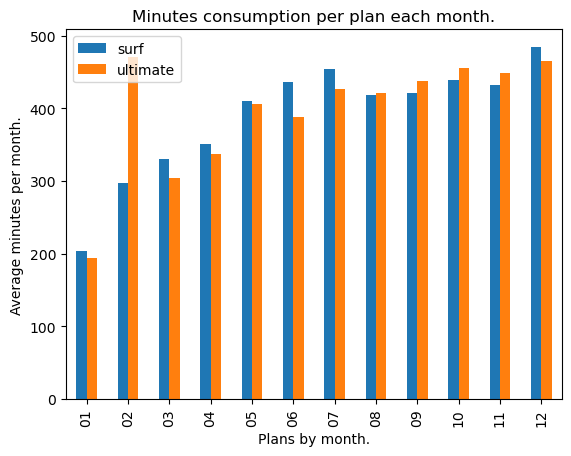

In [116]:
# Compare the average call duration by each plan and by each month. Plot a bar chart to visualize it.

df_ttinfcall = df_ttinf.reindex(['Minutesxmonth'], axis=1)

df_ttinfcall1=df_ttinfcall.groupby(by=["month_x", "plan"])['Minutesxmonth'].mean()
df_ttinfcall1=pd.DataFrame(df_ttinfcall1)
display(df_ttinfcall1)

ex1 = df_ttinfcall.pivot_table(index='month_x', 
                            columns='plan', 
                            values='Minutesxmonth', 
                            aggfunc='mean' 
                           )


ex1.plot(
        kind='bar',
        title='Minutes consumption per plan each month.',
        xlabel='Plans by month.',
        ylabel='Average minutes per month.')

plt.legend(['surf', 'ultimate'])
plt.show()

plan,surf,ultimate
month_x,,
01,60,112
02,366,408
03,1068,552
04,2444,998
05,4289,1670
06,5769,2452
07,7642,3463
08,9325,4265
09,11273,5250


Qcallsxmonth
month_x plan                  
01      surf                60
        ultimate           112
02      surf               366
        ultimate           408
03      surf              1068
        ultimate           552
04      surf              2444
        ultimate           998
05      surf              4289
        ultimate          1670
06      surf              5769
        ultimate          2452
07      surf              7642
        ultimate          3463
08      surf              9325
        ultimate          4265
09      surf             11273
        ultimate          5250
10      surf             14303
        ultimate          6761
11      surf             16731
        ultimate          7920
12      surf             20814
        ultimate          9800

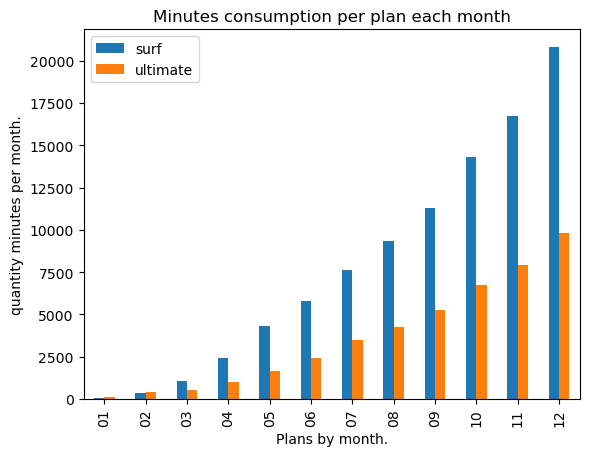

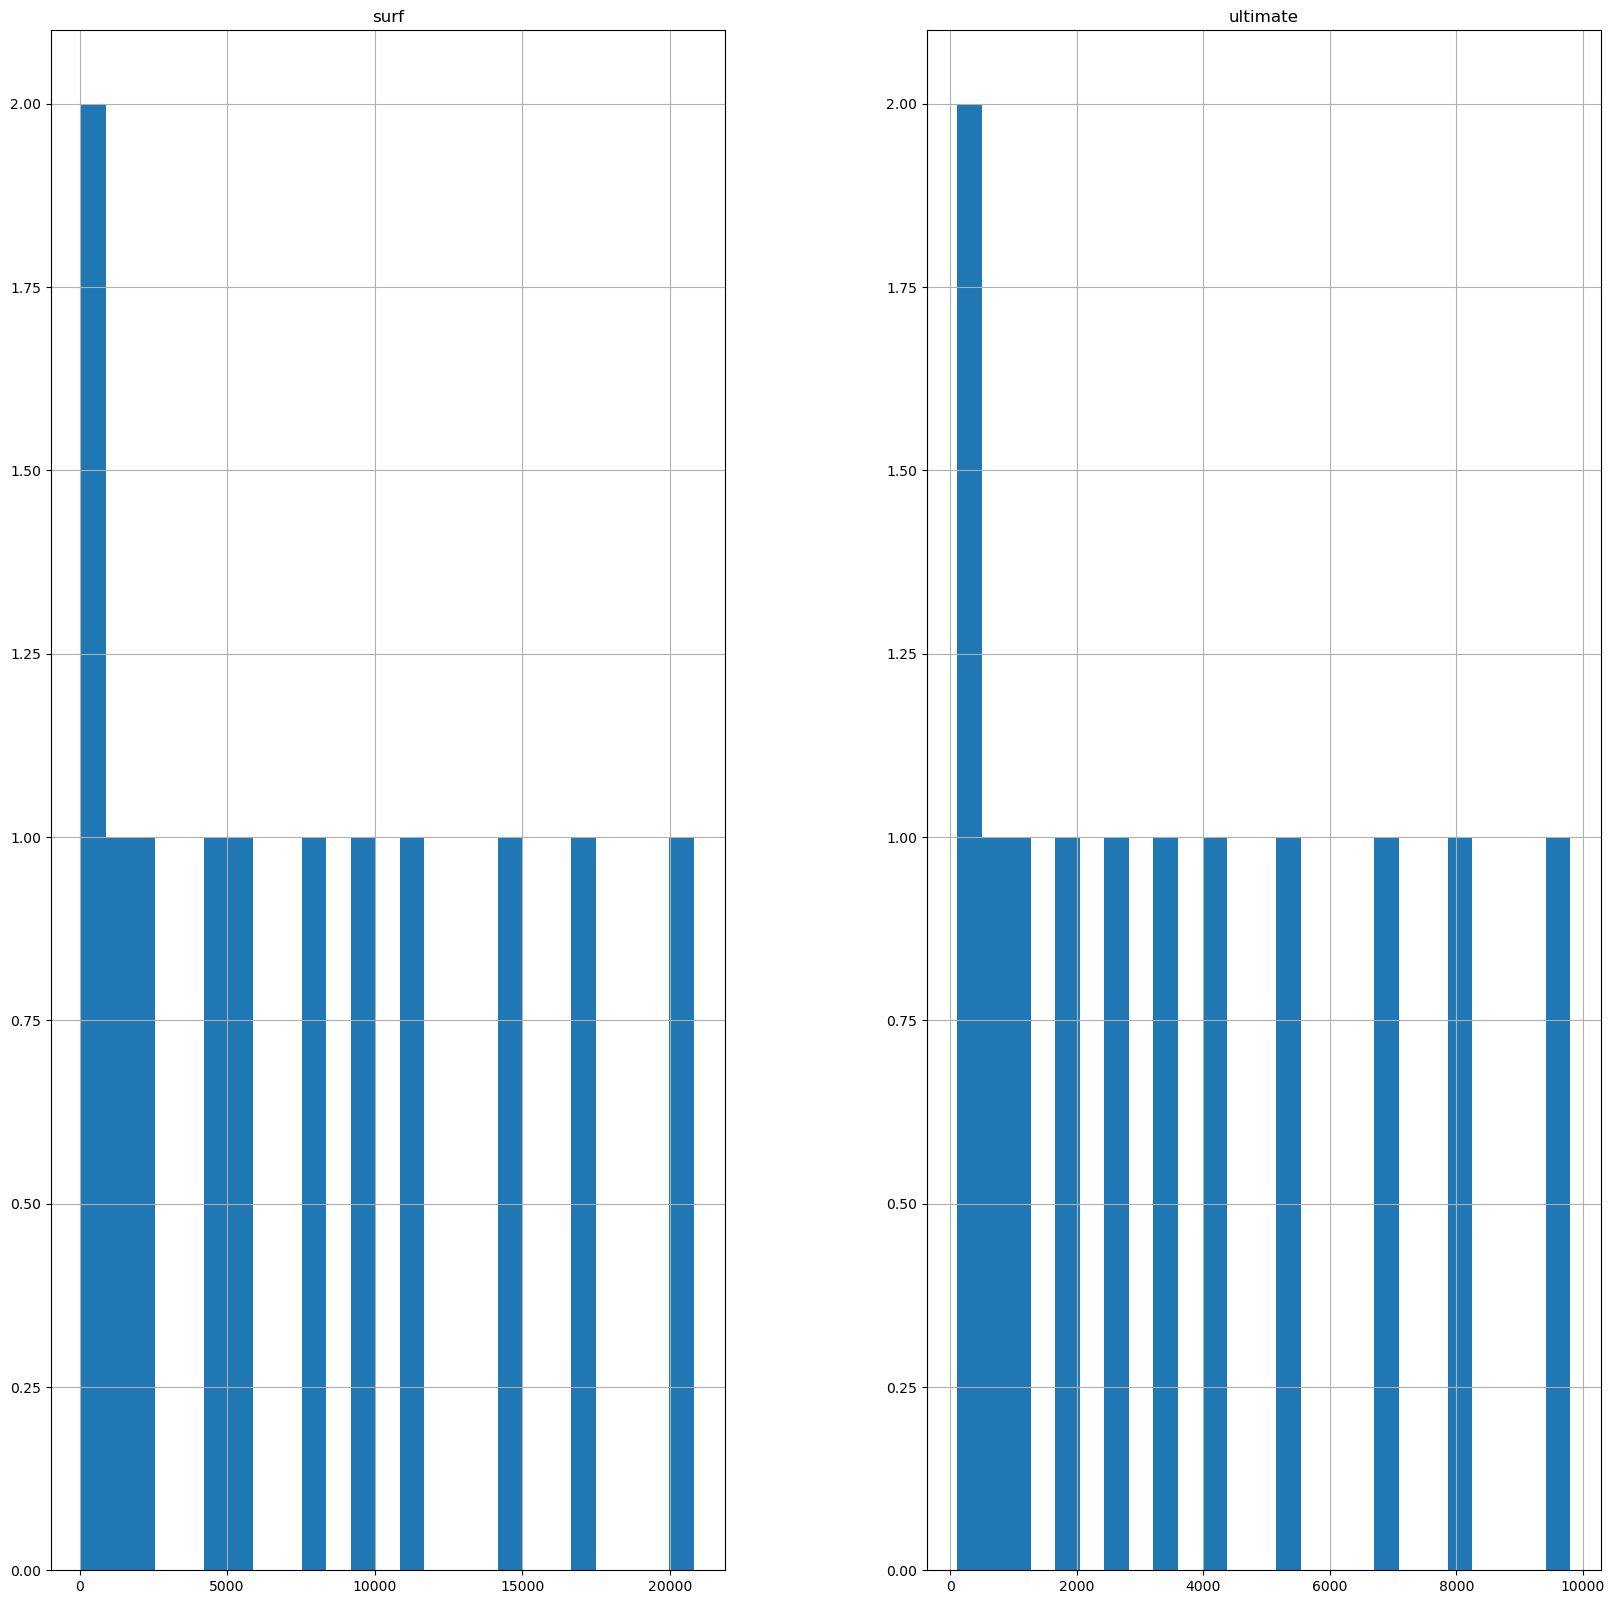

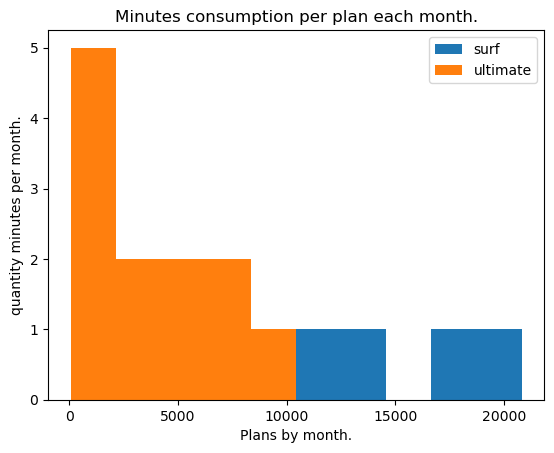

In [117]:
# Compare the number of monthly minutes needed by users of each plan. . Plot a histogram.

df_ttinfqqcall = df_ttinf.reindex(['Qcallsxmonth'], axis=1)

df_ttinfqqcall1=df_ttinfqqcall.groupby(by=["month_x", "plan"])['Qcallsxmonth'].sum()
df_ttinfqqcall1=pd.DataFrame(df_ttinfqqcall1)


qcx1 = df_ttinfqqcall.pivot_table(index='month_x', 
                            columns='plan', 
                            values='Qcallsxmonth', 
                            aggfunc='sum' 
                           )

display(qcx1)
display(df_ttinfqqcall1)

qcx1.plot(
        kind='bar',
        title='Minutes consumption per plan each month',
        xlabel='Plans by month.',
        ylabel='quantity minutes per month.')

plt.legend(['surf', 'ultimate'])
plt.show()

qcx1.hist(bins=25, figsize=(20,20))
plt.show()

qcx1.plot(
        kind='hist',
        title='Minutes consumption per plan each month.',
        xlabel='Plans by month.',
        ylabel='quantity minutes per month.')

plt.legend(['surf', 'ultimate'])
plt.show()


In [118]:
# Calculate the mean and variance of the monthly call duration.
medcalls =  df_calls

# Mean number of calls per month.
display('The monthly mean of calls is equal to: ')
mediacalls=medcalls['duration'].mean()
display(mediacalls)

display('The monthly variance of calls is equal to: ')
variancecall = np.var(medcalls['duration'])
print(variancecall)

# Median number of calls per month.
display('The monthly median of calls is equal to: ')
medianacalls=medcalls['duration'].median()
display(medianacalls)

'The monthly mean of calls is equal to: '

7.146672958942897

'The monthly variance of calls is equal to: '

35.44889035380186


'The monthly median of calls is equal to: '

6.0

Minutesxmonth  minutes_included  \
user_id month_x service plan                                        
1000    12      qcall   ultimate            124              3000   
1001    08      qcall   surf                182               500   
        09      qcall   surf                315               500   
        10      qcall   surf                393               500   
        11      qcall   surf                426               500   
...                                         ...               ...   
1498    12      qcall   surf                339               500   
1499    09      qcall   surf                346               500   
        10      qcall   surf                385               500   
        11      qcall   surf                308               500   
        12      qcall   surf                496               500   

                                  usd_per_minute  ad_minut     plan2  
user_id month_x service plan                                          
1000    12      qcall   ultimate            0.01       0.0  ultimate  
1001    08      qcall   surf                0.03       0.0      surf  
        09      qcall   surf                0.03       0.0      surf  
        10      qcall   surf                0.03       0.0      surf  
        11      qcall   surf                0.03       0.0      surf  
...                                          ...       ...       ...  
1498    12      qcall   surf                0.03       0.0      surf  
1499    09      qcall   surf                0.03       0.0      surf  
        10      qcall   surf                0.03       0.0      surf  
        11      qcall   surf                0.03       0.0      surf  
        12      qcall   surf                0.03       0.0      surf  

[2258 rows x 5 columns]

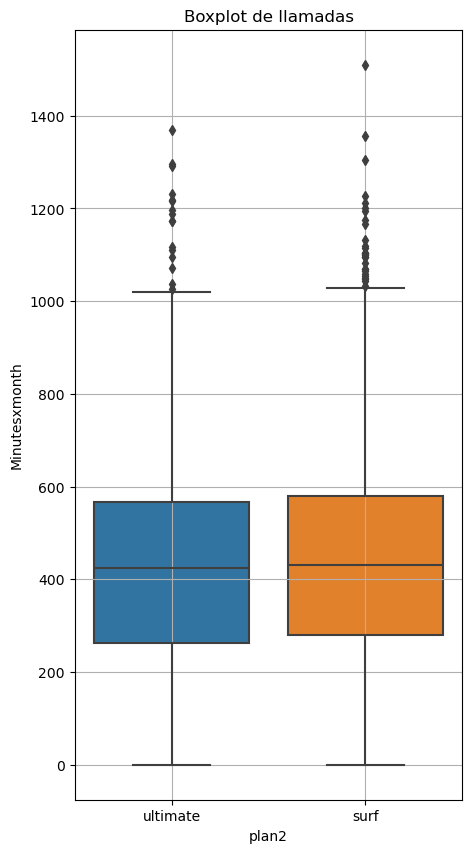

count    2258.000000
mean      435.937555
std       231.972343
min         0.000000
25%       275.000000
50%       429.000000
75%       574.750000
max      1510.000000
Name: Minutesxmonth, dtype: float64

In [119]:
# Plot a box plot to visualize the distribution of the monthly call duration.
medcalls =  l2
medcalls['plan2']=np.where(medcalls['minutes_included']==3000, 'ultimate', 'surf')
display(medcalls)
vanumerica= 'Minutesxmonth'
variable_categorica= 'plan2'
titulodelgrafico = 'Boxplot de llamadas'

plt.figure(figsize=(5,10))
sns.boxplot(x=variable_categorica, y=vanumerica, data=medcalls)
plt.title(titulodelgrafico)
plt.grid(True)
plt.show()

medcalls['Minutesxmonth'].describe()


**Interpretation of the graph**  
In the upper graph, we can see how the calls are distributed across the different plans offered by the company.  

In the graph, we observe that for the Ultimate plan, 50% of the call duration is between 230 and 570 minutes, which is very similar to the Surf plan, which also concentrates its data in this same range.  

The segment dividing the box into two parts is the median. In this case, both means are very similar, indicating that the distribution is symmetrical, and the mean, median, and mode coincide.  

Additionally, when comparing the data, it is established that the Surf plan has many outlier data points above the maximum, indicating that it is more popular and used than the other plan.  

Furthermore, a full comparison of the two plans is made, which establishes the behavior of both in their different services. Visually, it can be quickly established that the Surf plan has a high uptake in the data consumption plan, for which clients must pay an additional fee when exceeding the data provided by the plan.  
Another observation is that in the Ultimate plan, users are aligned with what they pay and consume, whereas in the Surf plan, the only service where an additional payment occurs is for internet, likely due to its higher uptake by clients, while the other services behave normally.


'COMPARISON OF ULTIMATE PLAN AND SERVICES OVER THE MONTHS.'

,ad_internet,ad_message,ad_minut,usd_monthly_pay
plan,ultimate,ultimate,ultimate,ultimate
month_x,,,,
01,0.000000,0.0,0.0,70.0
02,0.000000,0.0,0.0,70.0
03,5.833333,0.0,0.0,70.0
04,3.666667,0.0,0.0,70.0
05,0.965517,0.0,0.0,70.0
06,1.866667,0.0,0.0,70.0
07,2.135593,0.0,0.0,70.0
08,3.450704,0.0,0.0,70.0


'COMPARISON OF SURF PLAN AND SERVICES OVER THE MONTHS.'

,ad_internet,ad_message,ad_minut,usd_monthly_pay
plan,surf,surf,surf,surf
month_x,,,,
01,0.000000,0.000000,0.000000,20.0
02,16.666667,0.026667,1.036667,20.0
03,27.391304,0.016957,0.706957,20.0
04,21.000000,0.052200,1.058400,20.0
05,29.066667,0.128800,1.702800,20.0
06,29.895833,0.150937,1.617813,20.0
07,44.083333,0.146500,2.216500,20.0
08,45.786164,0.183585,1.683396,20.0


<Axes: title={'center': 'Plan SURF and services'}, xlabel='Plans by month.', ylabel='Average service income.'>

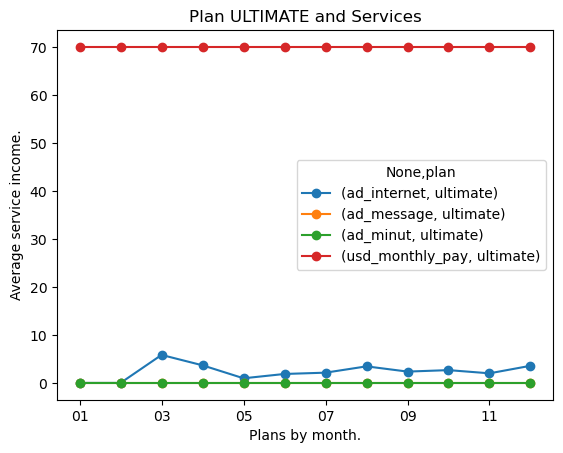

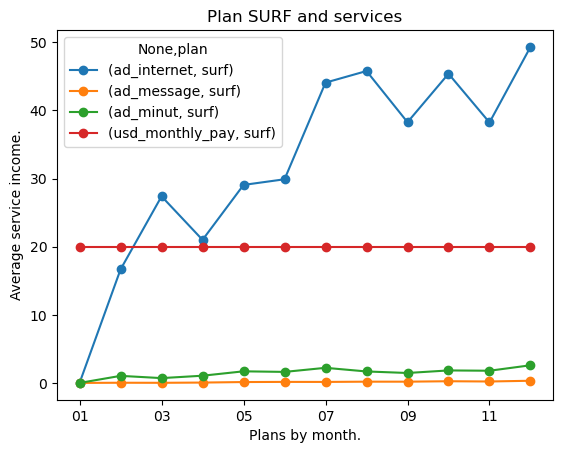

In [120]:
df_ttinf['plan2']=np.where(df_ttinf['minutes_included']==3000, 'ultimate', 'surf')
df_ttinf = pd.DataFrame(df_ttinf)
variable1 = df_ttinf[df_ttinf['plan2']=='ultimate']
display("COMPARISON OF ULTIMATE PLAN AND SERVICES OVER THE MONTHS.")
exnew1 = variable1.pivot_table(index='month_x', 
                            columns='plan', 
                            values=['usd_monthly_pay', 'ad_minut', 'ad_message', 'ad_internet'], 
                            aggfunc='mean' 
                           )

display(exnew1)

exnew1.plot(
        kind='line',
        marker = "o",
        title='Plan ULTIMATE and Services',
        xlabel='Plans by month.',
        ylabel='Average service income.')


variable2 = df_ttinf[df_ttinf['plan2']=='surf']
display("COMPARISON OF SURF PLAN AND SERVICES OVER THE MONTHS.")
exnew2 = variable2.pivot_table(index='month_x', 
                            columns='plan', 
                            values=['usd_monthly_pay', 'ad_minut', 'ad_message', 'ad_internet'], 
                            aggfunc='mean' 
                           )

display(exnew2)

exnew2.plot(
        kind='line',
        marker = "o",
        title='Plan SURF and services',
        xlabel='Plans by month.',
        ylabel='Average service income.')

### Messages

messagexmonth
month_x plan                   
01      surf          10.500000
        ultimate      15.500000
02      surf          12.000000
        ultimate      23.166667
03      surf          15.260870
        ultimate      20.250000
04      surf          17.400000
        ultimate      22.047619
05      surf          24.386667
        ultimate      32.103448
06      surf          25.281250
        ultimate      30.533333
07      surf          27.025000
        ultimate      32.830508
08      surf          28.855346
        ultimate      38.478873
09      surf          30.376963
        ultimate      37.895349
10      surf          33.267241
        ultimate      39.800000
11      surf          32.115523
        ultimate      38.579365
12      surf          38.212219
        ultimate      45.087248

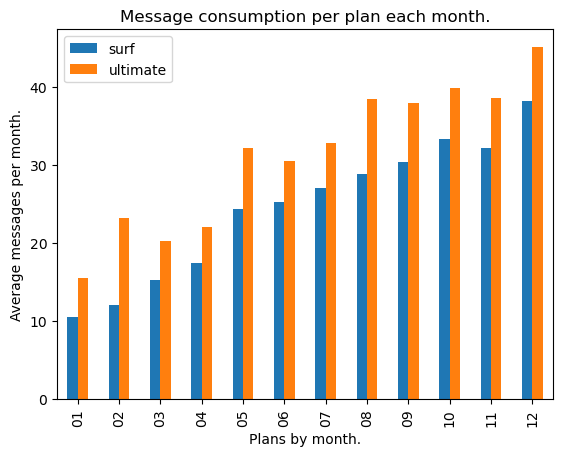

In [121]:
# Compare the number of messages sent each month by users of each plan.
df_ttinfmess = df_ttinf.reindex(['messagexmonth'], axis=1)

df_ttinfmess1=df_ttinfmess.groupby(by=["month_x", "plan"])['messagexmonth'].mean()
df_ttinfmess1=pd.DataFrame(df_ttinfmess1)
display(df_ttinfmess1)

mx1 = df_ttinfmess.pivot_table(index='month_x', 
                            columns='plan', 
                            values='messagexmonth', 
                            aggfunc='mean' 
                           )


mx1.plot(
        kind='bar',
        title='Message consumption per plan each month.',
        xlabel='Plans by month.',
        ylabel='Average messages per month.')

plt.legend(['surf', 'ultimate'])
plt.show()


In [122]:
# Calculate the mean and variance of the number of messages.
medmess =  df_ttinfmess1

# Mean number of messages per month.
display('The monthly mean of messages is equal to: ')
mediamess=medmess['messagexmonth'].mean()
display(mediamess)

display('The monthly variance of messages is equal to: ')
variancemess = np.var(medmess['messagexmonth'])
print(variancemess)

# Median number of messages per month.
display('The monthly median of messages is equal to: ')
medianamess=medmess['messagexmonth'].median()
display(medianacalls)


'The monthly mean of messages is equal to: '

27.956395427723635

'The monthly variance of messages is equal to: '

86.92319265441144


'The monthly median of messages is equal to: '

6.0

messagexmonth  messages_included  \
user_id month_x service plan                                         
1000    12      qmss    ultimate             11               1000   
1001    08      qmss    surf                 30                 50   
        09      qmss    surf                 44                 50   
        10      qmss    surf                 53                 50   
        11      qmss    surf                 36                 50   
...                                         ...                ...   
1496    09      qmss    surf                 21                 50   
        10      qmss    surf                 18                 50   
        11      qmss    surf                 13                 50   
        12      qmss    surf                 11                 50   
1497    12      qmss    ultimate             50               1000   

                                  usd_per_message  ad_message     plan2  
user_id month_x service plan                                             
1000    12      qmss    ultimate             0.01        0.00  ultimate  
1001    08      qmss    surf                 0.03        0.00      surf  
        09      qmss    surf                 0.03        0.00      surf  
        10      qmss    surf                 0.03        0.09      surf  
        11      qmss    surf                 0.03        0.00      surf  
...                                           ...         ...       ...  
1496    09      qmss    surf                 0.03        0.00      surf  
        10      qmss    surf                 0.03        0.00      surf  
        11      qmss    surf                 0.03        0.00      surf  
        12      qmss    surf                 0.03        0.00      surf  
1497    12      qmss    ultimate             0.01        0.00  ultimate  

[1806 rows x 5 columns]

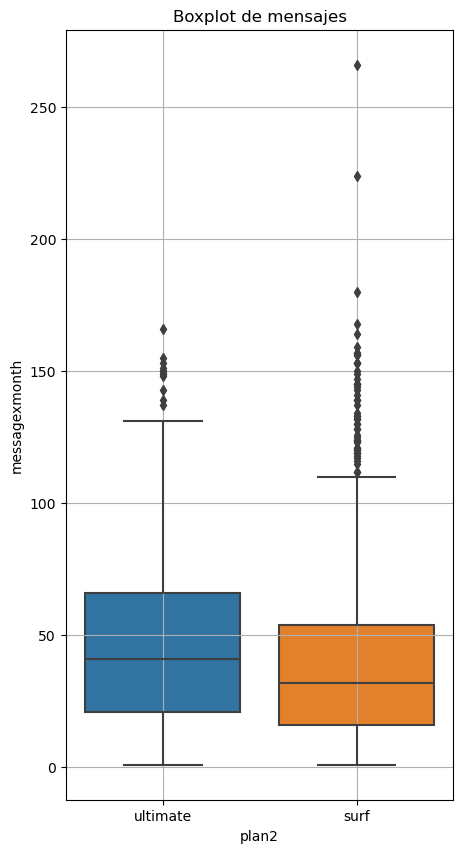

count    1806.000000
mean       42.110188
std        33.122931
min         1.000000
25%        17.000000
50%        34.000000
75%        59.000000
max       266.000000
Name: messagexmonth, dtype: float64

In [123]:
# Plot a box plot to visualize the monthly distribution of messages.
medmessage =  m2
medmessage['plan2']=np.where(medmessage['messages_included']==1000, 'ultimate', 'surf')
display(medmessage)
vanumerica1= 'messagexmonth'
variable_categorica1= 'plan2'
titulodelgrafico1 = 'Boxplot de mensajes'

plt.figure(figsize=(5,10))
sns.boxplot(x=variable_categorica1, y=vanumerica1, data=medmessage)
plt.title(titulodelgrafico1)
plt.grid(True)
plt.show()
m2['messagexmonth'].describe()


**"It is evident that in the graph for the Ultimate plan, the data is very dispersed, which is not the case in the Surf plan, as the data is much more concentrated.

It is shown that the data in the Surf plan has less variability, as the length of the box is shorter than in the Ultimate plan.

Both graphs show that the mean is closer to Q1, indicating positive skewness, and the data is positively skewed upward (to the right), meaning the mean is greater than the median, and the median is greater than the mode.

It is determined that the Ultimate plan is the one with the highest uptake by clients and is much more used. This is consistent with the bar graph, which shows an increase in messages and greater usage in this plan.

We can also analyze that the 3rd quartile of the Surf plan ends much earlier than the Ultimate plan, which tells us that as the number of messages increases, there is a greater concentration of people in the Ultimate plan. We also notice that the Surf plan has many more outlier values."**

### Internet

gbxmonth
user_id month_x plan              
1000    12      ultimate       2.0
1001    08      surf           7.0
        09      surf          14.0
        10      surf          23.0
        11      surf          19.0
        12      surf          20.0
1002    10      surf           7.0
        11      surf          20.0
        12      surf          15.0
1003    12      surf          28.0
1004    05      surf           7.0
        06      surf          21.0
        07      surf          25.0
        08      surf          28.0
        09      surf          19.0

gbxmonth
month_x plan              
01      surf           5.0
        ultimate       8.0
02      surf          13.0
        ultimate      19.0
03      surf          14.0
        ultimate      19.0
04      surf          13.0
        ultimate      17.0
05      surf          15.0
        ultimate      18.0
06      surf          16.0
        ultimate      17.0
07      surf          18.0
        ultimate      17.0
08      surf          18.0
        ultimate      19.0
09      surf          17.0
        ultimate      18.0
10      surf          18.0
        ultimate      19.0
11      surf          17.0
        ultimate      18.0
12      surf          19.0
        ultimate      19.0

plan,surf,ultimate
month_x,,
01,5.0,8.0
02,13.0,19.0
03,14.0,19.0
04,13.0,17.0
05,15.0,18.0
06,16.0,17.0
07,18.0,17.0
08,18.0,19.0
09,17.0,18.0


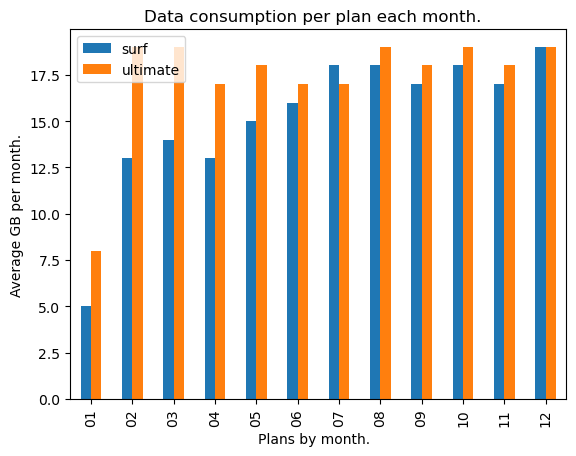

In [124]:
# Compare data consumption each month by users of each plan.
df_ttinfinter = df_ttinf.reindex(['gbxmonth'], axis=1)
display(df_ttinfinter.head(15))

df_ttinfinter2=df_ttinfinter.groupby(by=["month_x", "plan"])['gbxmonth'].mean().apply(np.ceil)
df_ttinfinter2=pd.DataFrame(df_ttinfinter2)
display(df_ttinfinter2)

intx1 = df_ttinfinter.pivot_table(index='month_x', 
                            columns='plan', 
                            values='gbxmonth', 
                            aggfunc='mean' 
                           ).apply(np.ceil)
display(intx1)

intx1.plot(
        kind='bar',
        title='Data consumption per plan each month.  ',
        xlabel='Plans by month.  ',
        ylabel='Average GB per month.')

plt.legend(['surf', 'ultimate'])
plt.show()

In [125]:
# Calculate the mean and variance of data consumption.
medinterne =  df_ttinf.reindex(['gbxmonth', 'gb_per_month_included'], axis=1)
display(medinterne)

# Mean number of messages per month.
display('The monthly mean of data consumption is equal to: ')
medinterne1=medinterne['gbxmonth'].mean()
display(medinterne1)

display('The monthly variance of data consumption is equal to: ')
varianceinter = np.var(medinterne['gbxmonth'])
print(varianceinter)

# Median number of messages per month.
display('The monthly median of data consumption is equal to: ')
medianaintern=medinterne['gbxmonth'].median()
display(medianaintern)

gbxmonth  gb_per_month_included
user_id month_x plan                                     
1000    12      ultimate       2.0                   30.0
1001    08      surf           7.0                   15.0
        09      surf          14.0                   15.0
        10      surf          23.0                   15.0
        11      surf          19.0                   15.0
...                            ...                    ...
1498    12      surf          24.0                   15.0
1499    09      surf          13.0                   15.0
        10      surf          20.0                   15.0
        11      surf          17.0                   15.0
        12      surf          23.0                   15.0

[2258 rows x 2 columns]

'The monthly mean of data consumption is equal to: '

17.236049601417182

'The monthly variance of data consumption is equal to: '

61.35216366804433


'The monthly median of data consumption is equal to: '

17.0

gbxmonth  gb_per_month_included  usd_per_gb  \
user_id month_x service plan                                                    
1000    12      qint    ultimate       2.0                   30.0         7.0   
1001    08      qint    surf           7.0                   15.0        10.0   
        09      qint    surf          14.0                   15.0        10.0   
        10      qint    surf          23.0                   15.0        10.0   
        11      qint    surf          19.0                   15.0        10.0   
...                                    ...                    ...         ...   
1498    12      qint    surf          24.0                   15.0        10.0   
1499    09      qint    surf          13.0                   15.0        10.0   
        10      qint    surf          20.0                   15.0        10.0   
        11      qint    surf          17.0                   15.0        10.0   
        12      qint    surf          23.0                   15.0        10.0   

                                  ad_internet     plan2  
user_id month_x service plan                             
1000    12      qint    ultimate          0.0  ultimate  
1001    08      qint    surf              0.0      surf  
        09      qint    surf              0.0      surf  
        10      qint    surf             80.0      surf  
        11      qint    surf             40.0      surf  
...                                       ...       ...  
1498    12      qint    surf             90.0      surf  
1499    09      qint    surf              0.0      surf  
        10      qint    surf             50.0      surf  
        11      qint    surf             20.0      surf  
        12      qint    surf             80.0      surf  

[2277 rows x 5 columns]

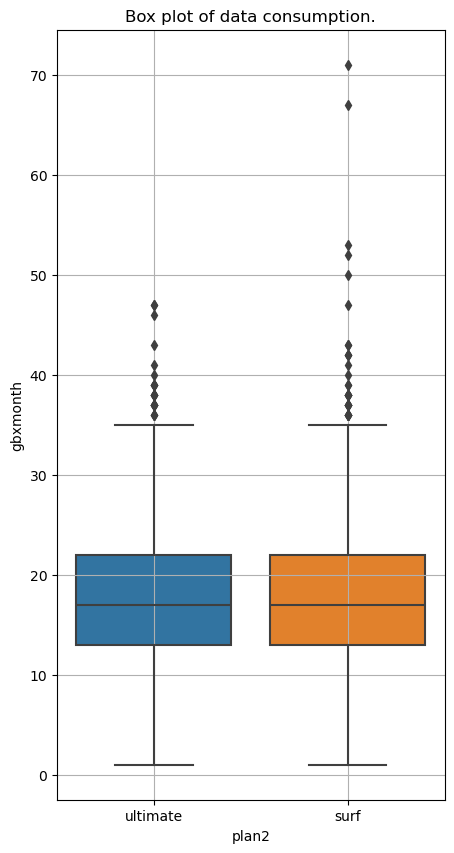

count    2277.000000
mean       17.372859
std         7.869052
min         1.000000
25%        13.000000
50%        17.000000
75%        22.000000
max        71.000000
Name: gbxmonth, dtype: float64

In [126]:
# Plot a box plot to visualize the data consumption distribution.
medinternet =  i2
medinternet['plan2']=np.where(medinternet['gb_per_month_included']==30, 'ultimate', 'surf')
display(medinternet)
vanumerica2= 'gbxmonth'
variable_categorica2= 'plan2'
titulodelgrafico2 = 'Box plot of data consumption.'

plt.figure(figsize=(5,10))
sns.boxplot(x=variable_categorica2, y=vanumerica2, data=medinternet)
plt.title(titulodelgrafico2)
plt.grid(True)
plt.show()
i2['gbxmonth'].describe()

**"It is evident that in both graphs, the behavior of both plans is very similar.

It is shown that the data in the Surf plan has less variability, as the length of the box is shorter than that of the Ultimate plan.

Both graphs show a symmetric distribution, as the median of both plans is in the middle of the box, indicating that the mean, mode, and median are equal.

A large number of outliers is evident in the Surf plan, which are above the maximum value of the box.

It is established that there is not much difference in the data consumption between both plans."**

## Income

plan,surf,ultimate
month_x,,
01,20.000000,70.000000
02,37.730000,70.000000
03,48.115217,75.833333
04,42.110600,73.666667
05,50.898267,70.965517
06,51.664583,71.866667
07,66.446333,72.135593
08,67.653145,73.450704
09,59.913455,72.360465


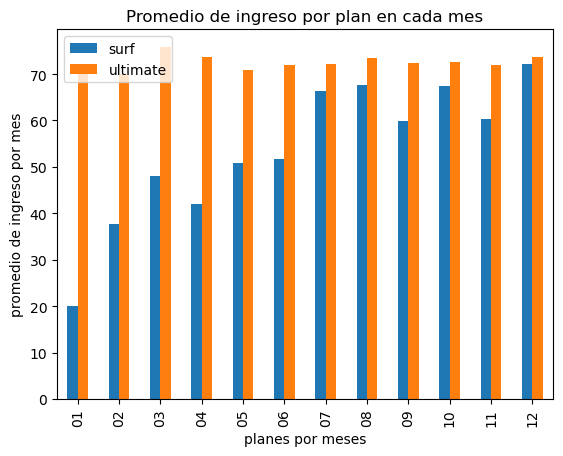

In [127]:
# Compare the income each month of each plan.

df_ttinfadjv1 = df_ttinfadj.reindex(['costtoxmonth'], axis=1)

df_ttinfadjv2=df_ttinfadjv1.groupby(by=["month_x", "plan"])['costtoxmonth'].mean()
df_ttinfadjv2=pd.DataFrame(df_ttinfadjv2)

costx1 = df_ttinfadjv1.pivot_table(index='month_x', 
                            columns='plan', 
                            values='costtoxmonth', 
                            aggfunc='mean' 
                           )
display(costx1)

costx1.plot(
        kind='bar',
        title='Promedio de ingreso por plan en cada mes',
        xlabel='planes por meses',
        ylabel='promedio de ingreso por mes')

plt.legend(['surf', 'ultimate'])
plt.show()

In [128]:
# Calculate the mean and variance of the income.

medingreso =  df_ttinf.reindex(['usd_monthly_pay', 'costtoxmonth'], axis=1)

# Mean cost per month.
display('The mean income is equal to:: ')
medingreso1=medingreso['costtoxmonth'].mean()
display(medingreso1)

display('The monthly variance of income is equal to: ')
varianceingreso = np.var(medingreso['costtoxmonth'])
print(varianceingreso)

#mediana de los mensajes por mes
display('Median number of messages per month. ')
medianaingreso=medingreso['costtoxmonth'].median()
display(medianaingreso)

'The mean income is equal to:: '

66.05443755535873

'The monthly variance of income is equal to: '

2177.7318408041324


'Median number of messages per month. '

70.0

usd_monthly_pay  Qcallsxmonth  Minutesxmonth  \
user_id month_x plan                                                     
1000    12      ultimate               70            16            124   
1001    08      surf                   20            27            182   
        09      surf                   20            49            315   
        10      surf                   20            65            393   
        11      surf                   20            64            426   
...                                   ...           ...            ...   
1498    12      surf                   20            39            339   
1499    09      surf                   20            41            346   
        10      surf                   20            53            385   
        11      surf                   20            45            308   
        12      surf                   20            65            496   

                          minutes_included  usd_per_minute  ad_minut  \
user_id month_x plan                                                   
1000    12      ultimate              3000            0.01       0.0   
1001    08      surf                   500            0.03       0.0   
        09      surf                   500            0.03       0.0   
        10      surf                   500            0.03       0.0   
        11      surf                   500            0.03       0.0   
...                                    ...             ...       ...   
1498    12      surf                   500            0.03       0.0   
1499    09      surf                   500            0.03       0.0   
        10      surf                   500            0.03       0.0   
        11      surf                   500            0.03       0.0   
        12      surf                   500            0.03       0.0   

                          messagexmonth  messages_included  usd_per_message  \
user_id month_x plan                                                          
1000    12      ultimate           11.0             1000.0             0.01   
1001    08      surf               30.0               50.0             0.03   
        09      surf               44.0               50.0             0.03   
        10      surf               53.0               50.0             0.03   
        11      surf               36.0               50.0             0.03   
...                                 ...                ...              ...   
1498    12      surf                0.0                0.0             0.00   
1499    09      surf                0.0                0.0             0.00   
        10      surf                0.0                0.0             0.00   
        11      surf                0.0                0.0             0.00   
        12      surf                0.0                0.0             0.00   

                          ad_message  gbxmonth  gb_per_month_included  \
user_id month_x plan                                                    
1000    12      ultimate        0.00       2.0                   30.0   
1001    08      surf            0.00       7.0                   15.0   
        09      surf            0.00      14.0                   15.0   
        10      surf            0.09      23.0                   15.0   
        11      surf            0.00      19.0                   15.0   
...                              ...       ...                    ...   
1498    12      surf            0.00      24.0                   15.0   
1499    09      surf            0.00      13.0                   15.0   
        10      surf            0.00      20.0                   15.0   
        11      surf            0.00      17.0                   15.0   
        12      surf            0.00      23.0                   15.0   

                          usd_per_gb  ad_internet  costtoxmonth     plan2  
user_id month_x plan                                                    

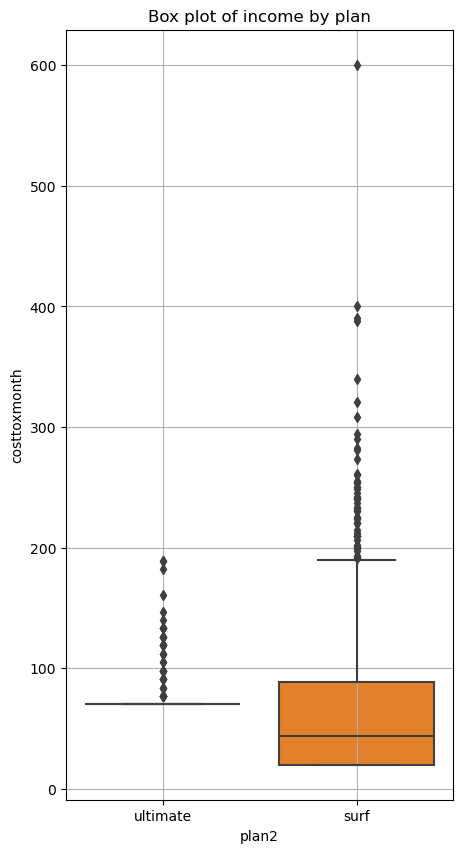

count    2258.000000
mean       66.054438
std        46.676511
min        20.000000
25%        25.512500
50%        70.000000
75%        70.000000
max       600.370000
Name: costtoxmonth, dtype: float64

In [129]:
medingresov1 =  df_ttinf

medingresov1['plan2']=np.where(medingresov1['usd_monthly_pay']==70, 'ultimate', 'surf')
display(medingresov1)
vanumerica3= 'costtoxmonth'
variable_categorica3= 'plan2'
titulodelgrafico3 = 'Box plot of income by plan'
plt.figure(figsize=(5,10))
sns.boxplot(x=variable_categorica3, y=vanumerica3, data=medingresov1)
plt.title(titulodelgrafico3)
plt.grid(True)
plt.show()
medingresov1['costtoxmonth'].describe()

**"It is evident that in the Ultimate plan, the data is constant with an average value of 70 USD, which means most users under this plan meet their needs. There are some outliers, but the maximum range is around $195. On the other hand, the behavior of the Surf plan shows positive skewness, as it is close to Q1 and is positively skewed to the right.

It is shown that the data in the Surf plan has greater variability, as the length of the box is larger than in the Ultimate plan.

Based on the graph, a large number of outliers is evident in the Surf plan, which are above the maximum value of the box. The graph shows that Surf plan clients pay much higher costs due to additional consumption in various services. This information is reinforced by the bar graph, which supports the conclusion that, over time, clients pay more for the Surf plan due to additional income, which does not occur with the Ultimate plan.

A complete comparison of the two plans is made, where the behavior of both is analyzed in their different services. Visually, it is quickly apparent that in the Surf plan, the data consumption service has a significant uptake, where clients need to pay an additional fee when exceeding the amount provided by the plan.
Another insight is that in the Ultimate plan, users are in line with what they pay and consume. In contrast, for the Surf plan, the only service with an additional charge is the internet, likely because it has the highest uptake among clients, whereas the other services behave differently."**

<Axes: title={'center': 'Plan SURF and services'}, xlabel='Plans by month.  ', ylabel='Average service income'>

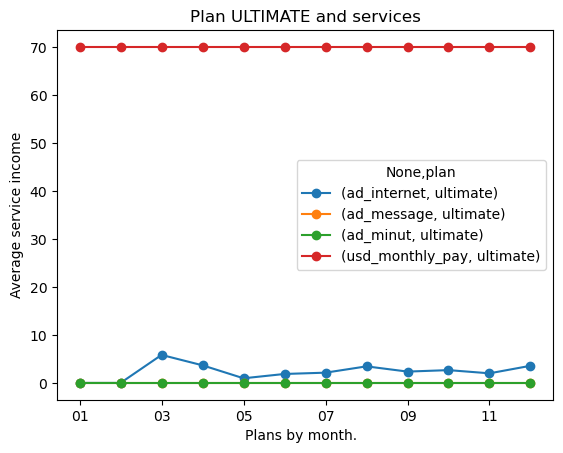

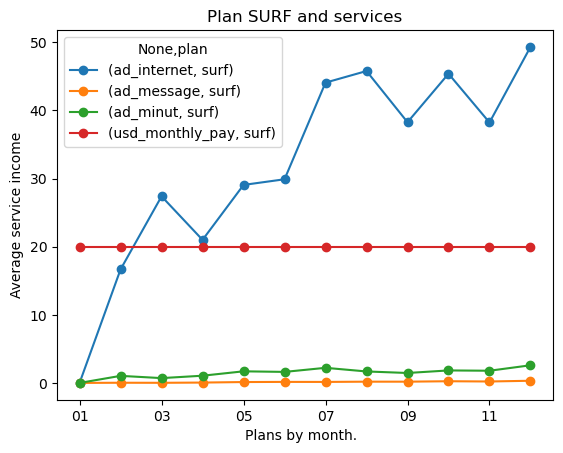

In [130]:

exnew1.plot(
        kind='line',
        marker = "o",
        title='Plan ULTIMATE and services',
        xlabel='Plans by month.  ',
        ylabel='Average service income')



exnew2.plot(
        kind='line',
        marker = "o",
        title='Plan SURF and services',
        xlabel='Plans by month.  ',
        ylabel='Average service income')

## Test the statistical hypotheses

In [131]:
# Test the hypotheses.  

df_ttingcall = df_ttinf.reindex([ 'ad_minut', 'minutes_included'], axis=1)
df_ttingcall['plan2']=np.where(df_ttingcall['minutes_included']==3000, 'ultimate', 'surf')
sample_1ultimate= df_ttingcall[df_ttingcall['plan2']=='ultimate']
sample_1ultimate1 = sample_1ultimate['ad_minut']
display(sample_1ultimate1)

sample_2surf= df_ttingcall[df_ttingcall['plan2']=='surf']
sample_2surf1 = sample_2surf['ad_minut']
display(sample_2surf1)

alpha = 0.05  # The critical statistical significance level  
# If the p-value is less than alpha, we reject the hypothesis. 

results = st.ttest_ind(sample_1ultimate1, sample_2surf1) # Perform a test  

print('valor p: ', results.pvalue) # Extract the p-value 

if results.pvalue < alpha: # Compare the p-value with the threshold 
    print("Reject the null hypothesis. ")
else:
    print("We cannot reject the null hypothesis.")

user_id  month_x  plan    
1000     12       ultimate    0.0
1006     11       ultimate    0.0
         12       ultimate    0.0
1008     10       ultimate    0.0
         11       ultimate    0.0
                             ... 
1493     09       ultimate    0.0
         10       ultimate    0.0
         11       ultimate    0.0
         12       ultimate    0.0
1497     12       ultimate    0.0
Name: ad_minut, Length: 713, dtype: float64

user_id  month_x  plan
1001     08       surf    0.0
         09       surf    0.0
         10       surf    0.0
         11       surf    0.0
         12       surf    0.0
                         ... 
1498     12       surf    0.0
1499     09       surf    0.0
         10       surf    0.0
         11       surf    0.0
         12       surf    0.0
Name: ad_minut, Length: 1545, dtype: float64

valor p:  1.7721882276535364e-38
Reject the null hypothesis. 


El valor p nos dice que aunque los ingresos para los dos planes son diferentes, existe un valor muy bajo de 
probabilidad de obtener aleatoriamente una diferencia de ese tamaño o mayor. Esta probabilidad es claramente 
demasiado alta para concluir que existe una diferencia significativa entre los ingresos

In [132]:
# Test the hypotheses. 

df_ttinfstate = pd.merge(df_ttinf, df_users, on=["user_id"], how="left")

df_ttinfstate2 = df_ttinfstate.reindex(['costtoxmonth', 'state'], axis=1)

sample_1stateNYNJ= df_ttinfstate2[(df_ttinfstate2['state']=='NY') | (df_ttinfstate2['state'] == 'NJ')]
sample_1stateNYNJ = sample_1stateNYNJ['costtoxmonth']
display(sample_1stateNYNJ)


sample_2other= df_ttinfstate2[(df_ttinfstate2['state']!='NY')| (df_ttinfstate2['state']!= 'NJ')]
sample_2other = sample_2other['costtoxmonth']
display(sample_2other)

alpha = 0.05  # The critical statistical significance level  
# If the p-value is less than alpha, we reject the hypothesis.  

results2 = st.ttest_ind(sample_1stateNYNJ, sample_2other) # Perform a test  

print('valor p: ', results2.pvalue) # Extract the p-value  

if results2.pvalue < alpha: # Compare the p-value with the threshold  
    print("Reject the null hypothesis.  ")
else:
    print("We cannot reject the null hypothesis.")

print()
print("Variance of the data from NYNJ")
varianzas1 = sample_1stateNYNJ.var()
print(varianzas1)


print()
print("Variance of the data from the other regions")
varianzas2 = sample_2other.var()
print(varianzas2)
    

354      20.00
355     133.18
356     112.85
357      93.27
358      92.67
359      32.46
450      50.03
451     172.97
452     185.49
453     191.17
454     161.44
900      20.00
901      22.37
902      23.36
1367     20.00
1368    161.20
1369    100.54
1370     20.00
1715     20.00
1716    140.00
1717     90.00
1718     62.37
1719     90.00
1720    110.00
1892     20.00
1893     20.00
1894     20.06
1895     20.00
1896     21.62
Name: costtoxmonth, dtype: float64

0        70.00
1        20.00
2        20.00
3       100.09
4        60.00
         ...  
2253    110.00
2254     20.00
2255     70.00
2256     40.00
2257    100.00
Name: costtoxmonth, Length: 2258, dtype: float64

valor p:  0.22016032722699225
We cannot reject the null hypothesis.

Variance of the data from NYNJ
3579.409818719211

Variance of the data from the other regions
2178.6967197765753


**"The p-value tells us that although the average amounts for the two channels are different, there is a 22% probability of obtaining similar revenues between the NY-NJ states and the other states. This probability is clearly too high to conclude that there is a significant difference in revenues between the states.

By establishing and validating the variances, the dispersion in the NY-NJ region is observed. It is found that when comparing this region with the other areas, the data is much less dispersed, indicating that this area has a good performance compared to the other areas."**

## General Conclusion

Answering the question:
- **Your task is to analyze customer behavior**: In the Surf plan, customers exceed the established consumption limits for each service, leading to additional charges. This occurs across all services (calls, messages, and internet).
- **Determine which prepaid plan generates the most revenue**: As clarified above, customers generate higher revenue by exceeding the limits established in the plan. This makes the "SURF" plan the one that generates the most revenue annually.

After answering the main points of the case, the process of addressing it is detailed as follows:
The process begins with the general loading of all the libraries to be used, followed by the loading of all the external files containing the information.

For the documents, the following steps were taken:
- A preview was conducted to assess how the data is presented (type of variables, relationships between tables, common data, or necessary segregation).
- For the plan rate data, a unification of variables was established to allow association of the data with the other external data as the product is developed.
- For the user data, validation of the extraction of states and plans was done for each user, by month. Additionally, variables were unified into the same type.
- In the calls data, variables were adjusted and approximations were made according to the monthly usage. Calls were rounded to the nearest whole number, and the date of usage was adjusted for each month of consumption.
- In the messages data, variables were adjusted, types were corrected, and the date was separated.
- For the internet service, adjustments were made to the variables and these were aligned after their monthly analysis.

Once the data was processed, it was unified for analysis, which will allow for long-term comparison of information and decision-making. After the unification of the data, analysis proceeded to determine the behavior of the data.

- **For the calling plan**: It was established that the Surf plan has higher minute consumption, which exceeds the provided plan limit, generating more profit.
- **For the messaging plan**: It was established that the Surf plan exceeds the outlier data in its box plot, indicating that this plan exceeds the established consumption limit for each plan.
- **For the internet plan**: It was established that the Surf plan generates the highest income, as it exceeds the standard consumption, causing additional revenue.

Finally, after verifying and unifying the income data that each user pays for their plan and adding the additional revenues from each service, it was concluded that the Surf plan generates the most revenue.